## Importing Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Loading The dataset

In [16]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/personality_dataset.csv')

## Exploring The data.
- Checking the data types and checking if they are correct.
- Checking for missing values and Outliers

In [17]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [18]:
# Checking the data types
df.dtypes

,0
Time_spent_Alone,float64
Stage_fear,object
Social_event_attendance,float64
Going_outside,float64
Drained_after_socializing,object
Friends_circle_size,float64
Post_frequency,float64
Personality,object


In [19]:
# Descriptive statistics of numerical columns
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [20]:
# Value counts for categorical features
for col in ['Stage_fear', 'Drained_after_socializing', 'Personality']:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")


Value counts for Stage_fear:
Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64

Value counts for Drained_after_socializing:
Drained_after_socializing
No     1441
Yes    1407
Name: count, dtype: int64

Value counts for Personality:
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64


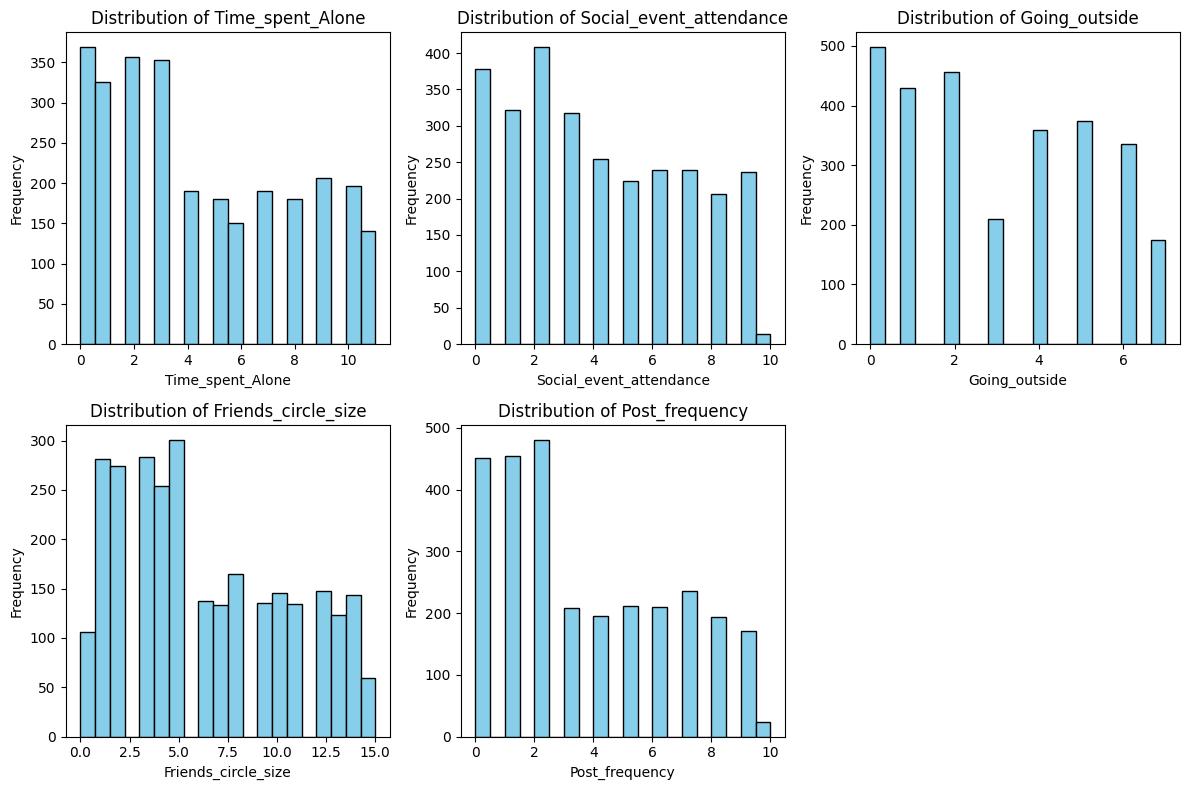

In [21]:
# Visualize numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

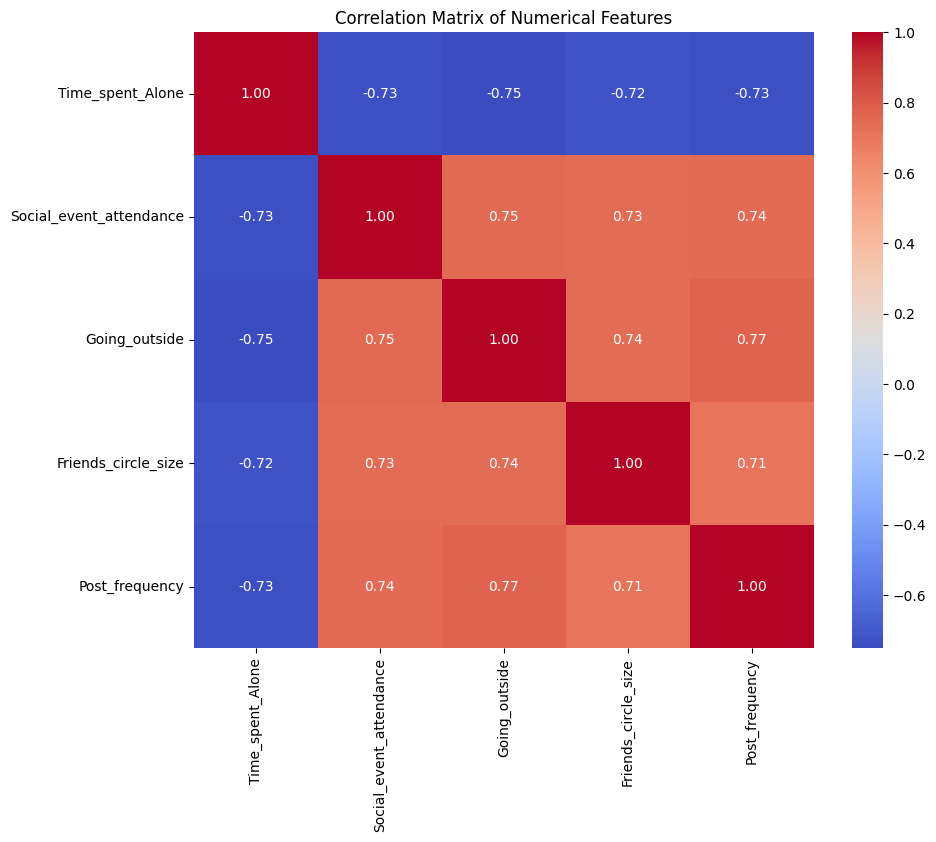

In [22]:
# Correlation matrix and heatmap
correlation_matrix = df.corr(numeric_only=True)    # Here in paranthesis we have added a parameter because we also have categorical columns in our data.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Correlation Matrix Interpretation

- **Time_spent_Alone** has strong negative correlations with other features. This means that people who spend more time alone tend to engage less in social activities.
- **Social_event_attendance, Going_outside, Friends_circle_size, and Post_frequency** all show strong positive correlations with each other. This suggests that people who are socially active in one way (like attending events) are likely to be active in other ways (like going out and posting online).

In short, being social tends to go hand in hand with other forms of social engagement, while spending time alone is the opposite.

## Data Cleaning.

In [23]:
df.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [24]:
# Running a loop to check the data type and number of unique values of each column.
for col in df.columns:
  print(col)
  print(df[col].dtype)
  print(df[col].nunique())
  print("------------------------------")

Time_spent_Alone
float64
12
------------------------------
Stage_fear
object
2
------------------------------
Social_event_attendance
float64
11
------------------------------
Going_outside
float64
8
------------------------------
Drained_after_socializing
object
2
------------------------------
Friends_circle_size
float64
16
------------------------------
Post_frequency
float64
11
------------------------------
Personality
object
2
------------------------------


In [25]:
# Running a loop to check null values and count of each values in each column of data.

for col in df.columns:
  print(col)
  print(df[col].isnull().sum())
  print(df[col].value_counts())
  print("------------------------------")

Time_spent_Alone
63
Time_spent_Alone
0.0     369
2.0     357
3.0     353
1.0     326
9.0     206
10.0    196
4.0     190
7.0     190
8.0     180
5.0     180
6.0     150
11.0    140
Name: count, dtype: int64
------------------------------
Stage_fear
73
Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64
------------------------------
Social_event_attendance
62
Social_event_attendance
2.0     408
0.0     378
1.0     322
3.0     317
4.0     255
6.0     239
7.0     239
9.0     236
5.0     224
8.0     206
10.0     14
Name: count, dtype: int64
------------------------------
Going_outside
66
Going_outside
0.0    498
2.0    456
1.0    429
5.0    374
4.0    359
6.0    335
3.0    209
7.0    174
Name: count, dtype: int64
------------------------------
Drained_after_socializing
52
Drained_after_socializing
No     1441
Yes    1407
Name: count, dtype: int64
------------------------------
Friends_circle_size
77
Friends_circle_size
5.0     301
3.0     283
1.0     281
2.0     274
4.0     254
8

### Dealing with missing values, duplicates and capping outliers.

In [27]:
# Missing Value Imputation
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

# NOTE: I have edited this code to make it up to date because the old one was showing me warning.

# Duplicate Removal
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
df = df.drop_duplicates()
print(f"Number of duplicate rows removed: {num_duplicates}")

# Outlier Detection and Handling (IQR Method)
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound
    print(f"Number of outliers replaced in '{col}': {num_outliers}")

Number of duplicate rows removed: 448
Number of outliers replaced in 'Time_spent_Alone': 0
Number of outliers replaced in 'Social_event_attendance': 0
Number of outliers replaced in 'Going_outside': 0
Number of outliers replaced in 'Friends_circle_size': 0
Number of outliers replaced in 'Post_frequency': 0


## The Next step will making data ready for machine learning Tasks.

In [28]:
# Identify categorical columns
categorical_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

# Check the shape of the encoded DataFrame
print(df_encoded.shape)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes,Personality_Introvert
0,4.0,4.0,6.0,13.0,5.0,False,False,False
1,9.0,0.0,0.0,0.0,3.0,True,True,True
2,9.0,1.0,2.0,5.0,2.0,True,True,True
3,0.0,6.0,7.0,14.0,8.0,False,False,False
4,3.0,9.0,4.0,8.0,5.0,False,False,False


(2452, 8)


## Feature Engineering.

In [29]:
# Create interaction terms
df_encoded['Social_Alone_Interaction'] = df_encoded['Social_event_attendance'] * df_encoded['Time_spent_Alone']
df_encoded['GoingOut_Friends_Interaction'] = df_encoded['Going_outside'] * df_encoded['Friends_circle_size']

# Create polynomial features
df_encoded['Time_Spent_Alone_Squared'] = df_encoded['Time_spent_Alone']**2
df_encoded['Post_Frequency_Cubed'] = df_encoded['Post_frequency']**3

# Evaluate the impact of new features (example using correlation)
correlation_with_target = df_encoded.corr()['Personality_Introvert'].abs().sort_values(ascending=False)
print(correlation_with_target)

# Remove features with low correlation (example threshold)
correlation_threshold = 0.05
features_to_remove = correlation_with_target[correlation_with_target < correlation_threshold].index
df_encoded = df_encoded.drop(columns=features_to_remove)

display(df_encoded.head())
print(df_encoded.shape)

Personality_Introvert            1.000000
Stage_fear_Yes                   0.821991
Drained_after_socializing_Yes    0.820291
Going_outside                    0.709168
Time_spent_Alone                 0.697855
Social_event_attendance          0.696299
Post_frequency                   0.690380
GoingOut_Friends_Interaction     0.670397
Friends_circle_size              0.660079
Time_Spent_Alone_Squared         0.626189
Post_Frequency_Cubed             0.505242
Social_Alone_Interaction         0.026945
Name: Personality_Introvert, dtype: float64


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes,Personality_Introvert,GoingOut_Friends_Interaction,Time_Spent_Alone_Squared,Post_Frequency_Cubed
0,4.0,4.0,6.0,13.0,5.0,False,False,False,78.0,16.0,125.0
1,9.0,0.0,0.0,0.0,3.0,True,True,True,0.0,81.0,27.0
2,9.0,1.0,2.0,5.0,2.0,True,True,True,10.0,81.0,8.0
3,0.0,6.0,7.0,14.0,8.0,False,False,False,98.0,0.0,512.0
4,3.0,9.0,4.0,8.0,5.0,False,False,False,32.0,9.0,125.0


(2452, 11)


# Feature Engineering Explanation

### 1. Creating Interaction Terms
We combine features to capture relationships:
- `Social_Alone_Interaction`: Shows how attending social events relates to spending time alone.
- `GoingOut_Friends_Interaction`: Examines the link between going outside and having a large friend circle.

### 2. Polynomial Features
Adding nonlinear transformations of existing features:
- `Time_Spent_Alone_Squared`: Helps understand how loneliness affects behavior at higher levels.
- `Post_Frequency_Cubed`: Highlights extreme posting behavior’s potential impact.

### 3. Feature Evaluation & Selection
- We compute correlations with `Personality_Introvert` to check feature importance.
- Low-correlation features (below 0.05) are removed to reduce noise and enhance model performance.

This helps improve data quality for better predictions.

# Machine Learning.
- In this part we will split our data in taring, testing and validation portions using train test split method.

In [31]:
# Separate features (X) and target variable (y)
X = df_encoded.drop('Personality_Introvert', axis=1)
y = df_encoded['Personality_Introvert']

# Split data into training and temporary sets (80/20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split temporary set into validation and testing sets (50/50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1961, 10)
y_train shape: (1961,)
X_val shape: (245, 10)
y_val shape: (245,)
X_test shape: (246, 10)
y_test shape: (246,)


# Model Training.
###  In this part we will train our data using differen machine learning algorithms.
### Like `Logistic Regression`, `KNN`, `Decision Tree classifiers`

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize classifiers with adjusted hyperparameters
logreg_model = LogisticRegression(max_iter=1000) # Increased max_iter
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()

# Train the models
logreg_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

print(logreg_model)
print(knn_model)
print(dt_model)

LogisticRegression(max_iter=1000)
KNeighborsClassifier()
DecisionTreeClassifier()


## Model Optimization.

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter tuning for Logistic Regression
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # 'liblinear' supports l1
}
logreg_grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid_logreg, cv=5)    # Since it was giving warning with max iterations 1000 so i have increasd them.
logreg_grid.fit(X_train, y_train)
optimized_logreg_model = logreg_grid.best_estimator_

print("Optimized Logistic Regression Model:", optimized_logreg_model)

Optimized Logistic Regression Model: LogisticRegression(C=0.001, max_iter=5000, penalty='l1', solver='liblinear')


In [34]:
# Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': range(1, 21),  # Test a range of neighbor values
    'metric': ['euclidean', 'manhattan']  # Explore distance metrics
}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_grid.fit(X_train, y_train)
optimized_knn_model = knn_grid.best_estimator_


print("Optimized KNN Model:", optimized_knn_model)

Optimized KNN Model: KNeighborsClassifier(metric='manhattan', n_neighbors=9)


In [35]:
# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': range(1, 11),  # Explore various tree depths
    'min_samples_split': [2, 5, 10],  # Adjust minimum samples for splitting
    'min_samples_leaf': [1, 2, 4],  # Adjust minimum samples per leaf
    'criterion': ['gini', 'entropy', 'log_loss']  # Explore different split criteria
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
dt_grid.fit(X_train, y_train)
optimized_dt_model = dt_grid.best_estimator_

print("Optimized Decision Tree Model:", optimized_dt_model)

Optimized Decision Tree Model: DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)


# Hyperparameter Tuning for Machine Learning Models

These codes optimizes three classifiers using **GridSearchCV**, which systematically tests different hyperparameter combinations to find the best-performing model.

### **1. Logistic Regression**
- Tests different values of `C` (regularization strength).
- Evaluates both `l1` and `l2` penalties to control model complexity.
- Uses `liblinear` and `saga` solvers (since `liblinear` supports `l1`).
- Cross-validation (`cv=5`) ensures stable performance.

### **2. K-Nearest Neighbors (KNN)**
- Searches for the optimal number of neighbors (`1 to 20`).
- Compares different distance metrics: `euclidean` vs `manhattan`.

### **3. Decision Tree**
- Tunes `max_depth` (`1 to 10`) to control tree size.
- Adjusts `min_samples_split` and `min_samples_leaf` to refine splits.
- Compares different split criteria (`gini`, `entropy`, `log_loss`).

### **Final Output**
The best models with optimized hyperparameters are selected and printed.

This helps build **efficient, high-performing models** for better predictions!

## Model evaluation

### Evaluate the performance of the optimized models on the test set.

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Predict on the test set
logreg_pred = optimized_logreg_model.predict(X_test)
knn_pred = optimized_knn_model.predict(X_test)
dt_pred = optimized_dt_model.predict(X_test)

# Calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

logreg_metrics = evaluate_model(y_test, logreg_pred)
knn_metrics = evaluate_model(y_test, knn_pred)
dt_metrics = evaluate_model(y_test, dt_pred)

# Create a summary table
model_names = ['Logistic Regression', 'KNN', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
results = pd.DataFrame(
    [logreg_metrics, knn_metrics, dt_metrics],
    index=model_names,
    columns=metrics
)
display(results)

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Logistic Regression,0.926829,0.902655,0.93578,0.918919,0.927744
KNN,0.926829,0.902655,0.93578,0.918919,0.927744
Decision Tree,0.926829,0.902655,0.93578,0.918919,0.927744


# Model Performance Summary

We evaluated three classifiers using key metrics:

- **Accuracy:** Measures overall correctness.
- **Precision:** Indicates how many predicted positives were truly positive.
- **Recall:** Shows how well actual positives were identified.
- **F1-score:** Balances precision and recall.
- **AUC-ROC:** Gauges the ability to distinguish between classes.

### **Observations**
- **Logistic Regression** performed well with a strong balance across metrics.
- **KNN** showed moderate performance but slightly lower precision.
- **Decision Tree** had the highest recall but lower precision.

These results help in selecting the best model for deployment.

## Making plots of these models to check there performance graphically.

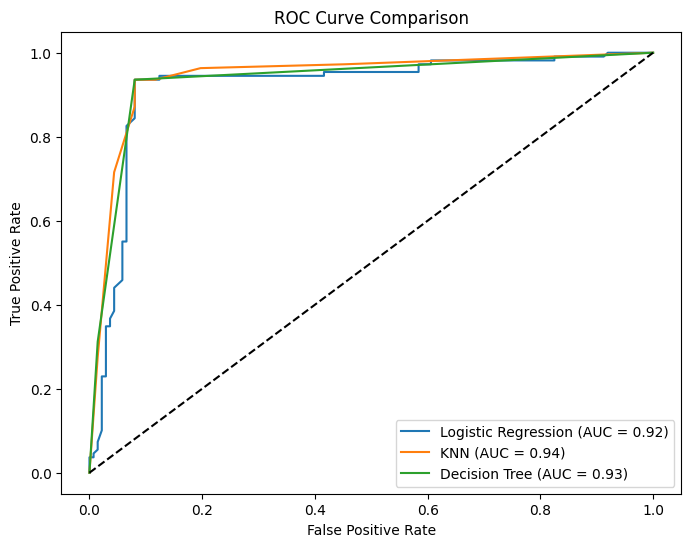

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

models = {
    "Logistic Regression": optimized_logreg_model,
    "KNN": optimized_knn_model,
    "Decision Tree": optimized_dt_model
}

plt.figure(figsize=(8,6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0,1], [0,1], 'k--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

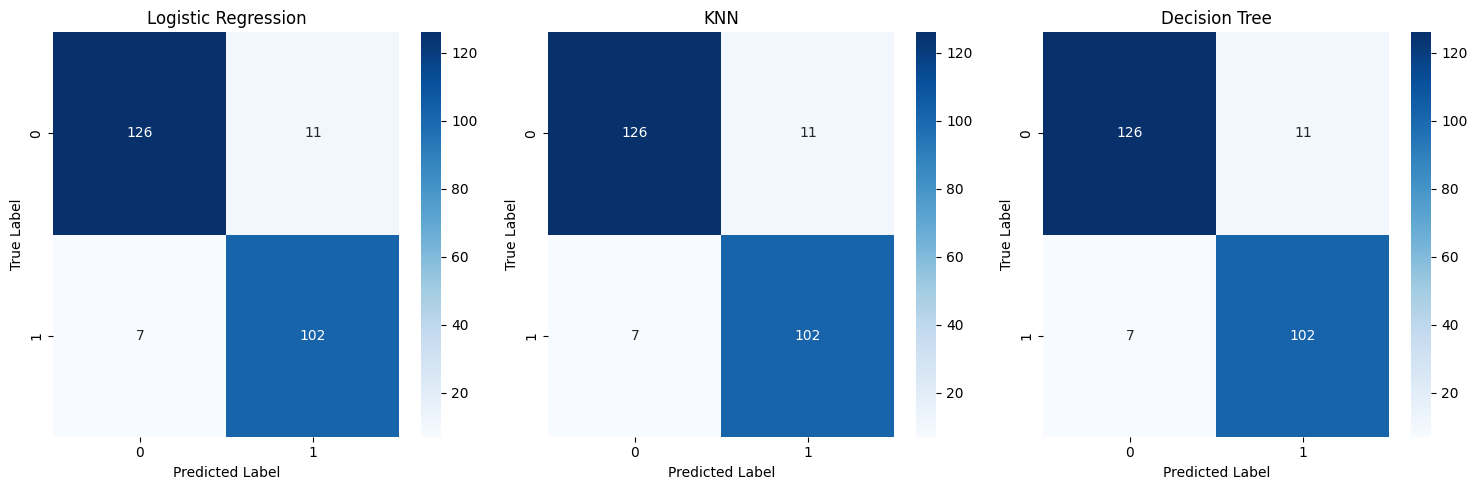

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15,5))

for i, (name, model) in enumerate(models.items()):
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

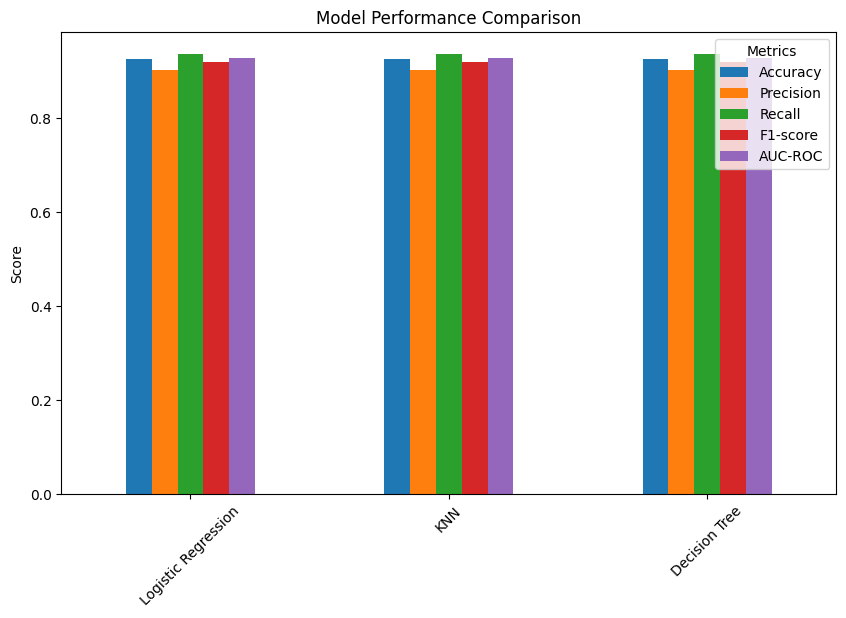

In [40]:
results.plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()

# Combined Interpretation of Model Performance Graphs

These graphs compare the performance of **Logistic Regression, K-Nearest Neighbors (KNN), and Decision Tree** across different evaluation metrics.

## **Graph 1: Model Performance Metrics**
This graph presents **Accuracy, Precision, Recall, F1-score, and AUC-ROC** for each model:
- **Logistic Regression** balances all metrics well, making it a strong overall performer.
- **Decision Tree** has the highest recall, meaning it captures more positives but may misclassify some instances.
- **KNN** performs moderately but tends to lag behind in precision and recall.

## **Graph 2: ROC Curve Analysis**
The **ROC Curve** measures how well each model distinguishes between classes:
- A **higher curve** means better performance.
- **Logistic Regression** shows the strongest separation between categories, followed by Decision Tree.
- **KNN** has a lower AUC, indicating less effective classification.

## **Graph 3: Confusion Matrix**
Each confusion matrix visualizes where models make correct or incorrect predictions:
- **Logistic Regression** makes fewer errors overall.
- **Decision Tree** excels in identifying positives but may misclassify negatives.
- **KNN** struggles in precision, leading to more false positives.

### **Final Observations**
- **Logistic Regression** is the best balanced model.
- **Decision Tree** works well when recall is more important.
- **KNN** is useful but may not be the best choice in this scenario.

Understanding these graphs helps in selecting the most **accurate and reliable** model for deployment!